[0.29999999999999999, 0.5, 0.20000000000000001, 0.0, 0.10000000000000001]


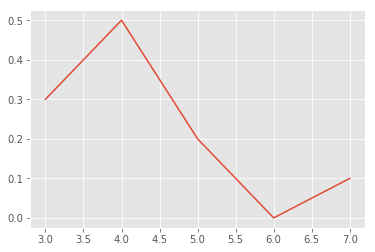

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
def n_l_transform(data_in):
	data_in_trans = data_in.assign(x3 = np.power(data_in['x1'],2))
	data_in_trans = data_in_trans.assign(x4 = np.power(data_in['x2'],2))
	data_in_trans = data_in_trans.assign(x5 = data_in['x1']*data_in['x2'])
	data_in_trans = data_in_trans.assign(x6 = np.absolute(data_in['x1']-data_in['x2']))
	data_in_trans = data_in_trans.assign(x7 = np.absolute(data_in['x1']+data_in['x2']))
	data_in_trans['x0'] = 1
	return data_in_trans
data_in = pd.read_csv('in.csv')
data_out = pd.read_csv('out.csv')
data_in_trans = n_l_transform(data_in)
data_out_trans = n_l_transform(data_out)
x_in = data_in_trans.loc[:,data_in_trans.columns!='y']
y_in = data_in_trans.loc[:,'y']
x_in_train = x_in.iloc[0:25,:]
y_in_train = y_in.iloc[0:25]
x_in_val = x_in.iloc[25:,:]
y_in_val = y_in.iloc[25:]
x_out = data_out_trans.loc[:,data_out_trans.columns!='y']
y_out = data_out_trans.loc[:,'y']
def linear_sol(x_in, y_in):
	sudo_inv_x = np.linalg.inv(np.transpose(x_in).dot(x_in)).dot(np.transpose(x_in))
	weight = sudo_inv_x.dot(y_in)
	return weight
def error_est(x_in, y_in, weight):
	y_in_pred = np.sign(x_in.dot(weight))
	return np.mean(y_in != y_in_pred)
def linear_sol_constrain(x_in, y_in, lamb):
	sudo_inv_x_reg = np.linalg.inv(np.transpose(x_in).dot(x_in) + lamb * np.identity(np.shape(x_in)[1])).dot(np.transpose(x_in))
	weight_reg = sudo_inv_x_reg.dot(y_in)
	return weight_reg

k_list = [3,4,5,6,7]
errors = []
for k in k_list:
	ind = list(range(0,k))
	ind.append(7)
	weight = linear_sol(x_in_train.iloc[:,ind],y_in_train)
	err = error_est(x_in_val.iloc[:,ind],y_in_val,weight)
	errors.append(err)

print(errors)
plt.plot(k_list,errors)
plt.show()

Q1, as shown above, in-sample validation error reaches lowest at k=6

[0.41999999999999998, 0.41599999999999998, 0.188, 0.084000000000000005, 0.071999999999999995]


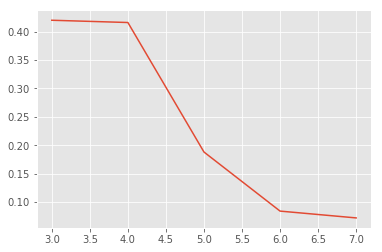

In [2]:
errors = []
for k in k_list:
	ind = list(range(0,k))
	ind.append(7)
	weight = linear_sol(x_in_train.iloc[:,ind],y_in_train)
	err = error_est(x_out.iloc[:,ind],y_out,weight)
	errors.append(err)

print(errors)
plt.plot(k_list,errors)
plt.show()

Q2, as shown above, out-of-sample error reaches lowest at k=7

[0.28000000000000003, 0.35999999999999999, 0.20000000000000001, 0.080000000000000002, 0.12]


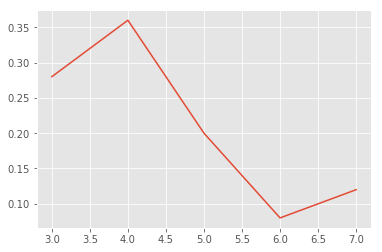

In [3]:
errors = []
for k in k_list:
	ind = list(range(0,k))
	ind.append(7)
	weight = linear_sol(x_in_val.iloc[:,ind],y_in_val)
	err = error_est(x_in_train.iloc[:,ind],y_in_train,weight)
	errors.append(err)

print(errors)
plt.plot(k_list,errors)
plt.show()

Q3, as shown above, switch training and validation set, still reaches lowest validation error at k=6

[0.39600000000000002, 0.38800000000000001, 0.28399999999999997, 0.192, 0.19600000000000001]


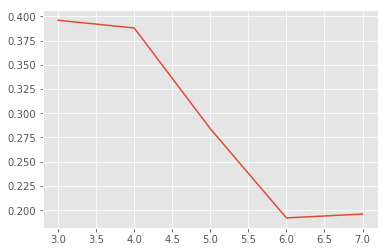

In [4]:
k_list = [3,4,5,6,7]
errors = []
for k in k_list:
	ind = list(range(0,k))
	ind.append(7)
	weight = linear_sol(x_in_val.iloc[:,ind],y_in_val)
	err = error_est(x_out.iloc[:,ind],y_out,weight)
	errors.append(err)

print(errors)
plt.plot(k_list,errors)
plt.show()

Q4, this time the out-of-sample error reaches minimum at k=6